# GMM

In [32]:
from sklearn.mixture import GaussianMixture as GMM
from ACSReader import Reader
import numpy as np

In [33]:
reader = Reader(target=['phAngle', 'power', 'reacPower', 'rmsCur'])

In [34]:
df, devices = reader.create_dataframe('./ACS-F2/')

In [35]:
df_train, df_test = reader.create_intersession_protocol(df)

In [36]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,label
phAngle_Monitor_Brilliance 235BL_1_0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,272.000,272.000,272.000,272.000,NaN,NaN,NaN,NaN,NaN,Monitor
power_Monitor_Brilliance 235BL_1_0,24.637,24.637,24.120,24.120,24.120,24.120,24.120,24.120,24.120,24.120,...,0.103,0.000,0.103,0.103,NaN,NaN,NaN,NaN,NaN,Monitor
reacPower_Monitor_Brilliance 235BL_1_0,-1.552,-1.552,-1.552,-1.449,-1.449,-1.449,-1.552,-1.552,-1.552,-1.449,...,-3.002,-3.002,-3.002,-3.002,NaN,NaN,NaN,NaN,NaN,Monitor
rmsCur_Monitor_Brilliance 235BL_1_0,0.175,0.174,0.171,0.170,0.171,0.171,0.172,0.171,0.172,0.171,...,0.013,0.013,0.013,0.013,NaN,NaN,NaN,NaN,NaN,Monitor
phAngle_Monitor_190B_1_3,352.000,352.000,352.000,352.000,352.000,352.000,352.000,275.000,275.000,275.000,...,349.000,349.000,349.000,349.000,NaN,NaN,NaN,NaN,NaN,Monitor


In [21]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,label
phAngle_Monitor_190B_2_1,349.000,349.000,349.000,349.000,349.000,349.000,349.000,349.000,349.000,349.000,...,349.000,349.000,349.000,NaN,NaN,NaN,NaN,NaN,NaN,Monitor
power_Monitor_190B_2_1,22.049,22.049,21.946,21.946,21.946,21.946,21.946,21.842,21.842,21.946,...,22.153,22.153,22.153,NaN,NaN,NaN,NaN,NaN,NaN,Monitor
reacPower_Monitor_190B_2_1,-5.279,-5.279,-5.383,-5.279,-5.279,-5.279,-5.279,-5.279,-5.279,-5.176,...,-4.761,-4.658,-4.658,NaN,NaN,NaN,NaN,NaN,NaN,Monitor
rmsCur_Monitor_190B_2_1,0.169,0.170,0.169,0.168,0.169,0.170,0.169,0.168,0.169,0.169,...,0.169,0.170,0.170,NaN,NaN,NaN,NaN,NaN,NaN,Monitor
phAngle_Monitor_Brilliance 235BL_2_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,355.000,355.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monitor


In [25]:
df_train_sig = reader.create_signature_dataset(df_train)
df_test_sig = reader.create_signature_dataset(df_test)

In [26]:
df_train_sig.head()

,phAngle,power,reacPower,rmsCur
Monitor,0,24.637,-1.552,0.175
Monitor,0,24.637,-1.552,0.174
Monitor,0,24.12,-1.552,0.171
Monitor,0,24.12,-1.449,0.17
Monitor,0,24.12,-1.449,0.171


In [27]:
df_test_sig.head()

,phAngle,power,reacPower,rmsCur
Monitor,349,22.049,-5.279,0.169
Monitor,349,22.049,-5.279,0.17
Monitor,349,21.946,-5.383,0.169
Monitor,349,21.946,-5.279,0.168
Monitor,349,21.946,-5.279,0.169


#### PhiAngle -> sin(PhiAngle)

In [28]:
df_train_sig['phAngle'] = df_train_sig['phAngle'].apply(lambda x: np.sin(x))
df_test_sig['phAngle'] = df_test_sig['phAngle'].apply(lambda x: np.sin(x))

In [29]:
df_train_sig_phi = df_train_sig
df_test_sig_phi = df_test_sig

#### Z-norm

In [30]:
train_mean = df_train_sig.mean(axis=0)
train_sigma = df_train_sig.std(axis=0)


In [31]:
df_train_sig_norm = (df_train_sig - train_mean) / train_sigma
df_test_sig_norm = (df_test_sig - train_mean) / train_sigma

### Compute GMM

Setting up some values for the experiment.

This takes quite some time.
Maybe change ```n_init``` to 1 and ```n_comp```to a single int

In [31]:
n_comp = list(range(0, 41, 4))
n_comp[0] = 1
Acc_rate = []
np.random.seed(1234)

In [32]:
label_dict = reader.create_label_dict()
label_dict

{'Monitor': 0,
 'Shaver': 1,
 'Microwave oven': 2,
 'Computer station': 3,
 'Hi-Fi system': 4,
 'Printer': 5,
 'Kettle': 6,
 'Laptop': 7,
 'Mobile phone': 8,
 'Lamp CFL': 9,
 'Fridge / Freezer': 10,
 'Fan': 11,
 'Coffee machine': 12,
 'TV': 13,
 'Lamp Inc.': 14}

#### Fit the GMM-Model using data with sin(phiAngle)


In [33]:

model_dict = dict(label_dict)

for k,v in model_dict.items():
    model_dict[k] = {} 
    for n in n_comp:
        model_dict[k][n] = None
    

In [34]:
for k in n_comp:
    for name, label in label_dict.items():
        #create model per class
        model = GMM(n_components=k, init_params='kmeans', n_init=10)
        #get values of class
        values = df_train_sig_phi[df_train_sig_phi.index == name].values
        #create label vector per class (numerical)
        class_labels = [label] * len(df_train_sig_phi[df_train_sig_phi.index == name].index.values)
        #fit the model
        model.fit(values, class_labels)
        #append it to model-list with the number of gaussans
        model_dict[name][k] = model

#### Training with z-norm and sin(phi)

In [35]:
model_dict_norm = dict(label_dict)

for k,v in model_dict_norm.items():
    model_dict_norm[k] = {} 
    for n in n_comp:
        model_dict_norm[k][n] = None
    

Here we do 10 tries. That takes quite some time. 

Maybe chang ```n_init``` to 1 and ```n_comp``` a single value

In [36]:
for k in n_comp:
    for name, label in label_dict.items():
        #create model per class
        model = GMM(n_components=k, init_params='kmeans', n_init=10)
        #get values of class
        values = df_train_sig_norm[df_train_sig_norm.index == name].values
        #create label vector per class (numerical)
        class_labels = [label] * len(df_train_sig_norm[df_train_sig_norm.index == name].index.values)
        #fit the model
        model.fit(values, class_labels)
        #append it to model-list with the number of gaussans
        model_dict_norm[name][k] = model

#### Results with data sin(PhiAngle)

In [37]:
result_dict = {}
for n in n_comp:
    result_dict[n] = None

In [38]:
for n in n_comp:
    Conf_mat = np.zeros([len(label_dict),len(label_dict)])
    for i, row in df_test_sig_phi.iterrows():
        class_score = []
        for name, models in model_dict.items():
            model = model_dict[name][n]
            class_score.append(model.score([row.values]))
        winning_pos = class_score.index(max(class_score))
        Conf_mat[winning_pos][label_dict[i]] += 1
    result_dict[n] = Conf_mat

#### Testing with z-norm and sin(phi)

In [39]:
result_dict_norm = {}
for n in n_comp:
    result_dict_norm[n] = None

In [40]:
for n in n_comp:
    Conf_mat = np.zeros([len(label_dict),len(label_dict)])
    for i, row in df_test_sig_norm.iterrows():
        class_score = []
        for name, models in model_dict_norm.items():
            model = model_dict[name][n]
            class_score.append(model.score([row.values]))
        winning_pos = class_score.index(max(class_score))
        Conf_mat[winning_pos][label_dict[i]] += 1
    result_dict_norm[n] = Conf_mat

### Plot Conf. Matrix


#### With sin(Phi)

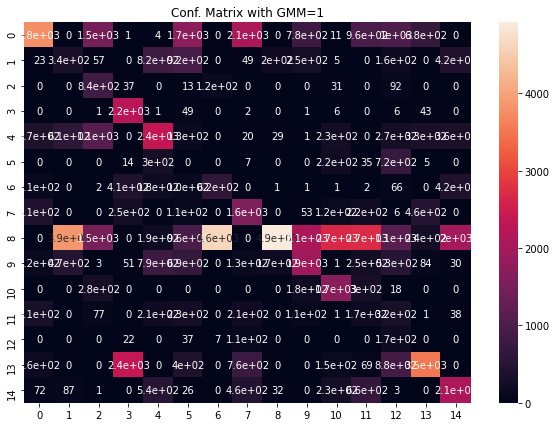

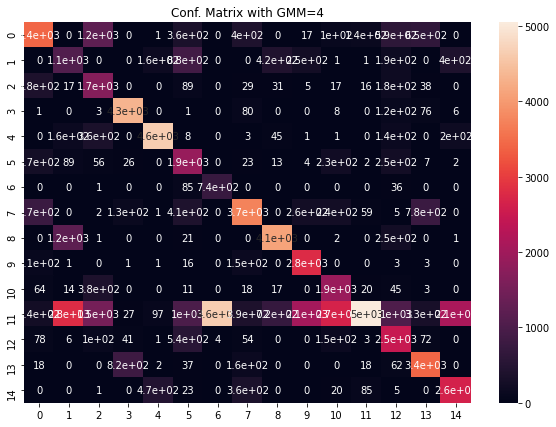

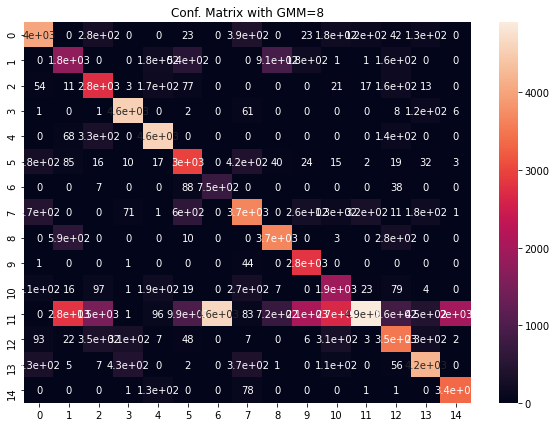

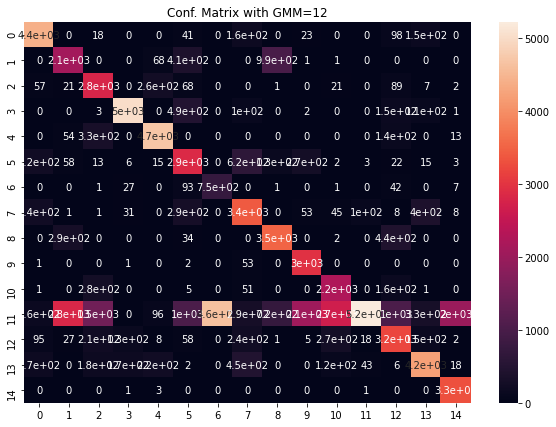

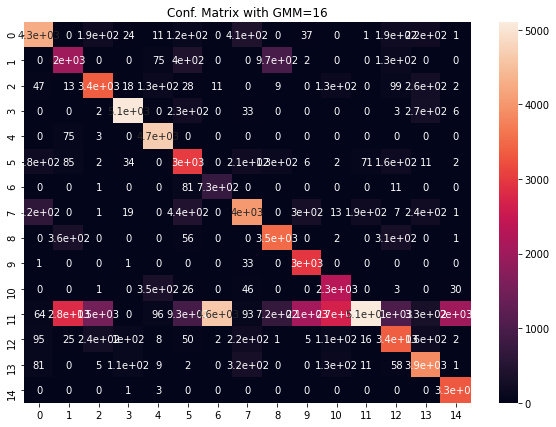

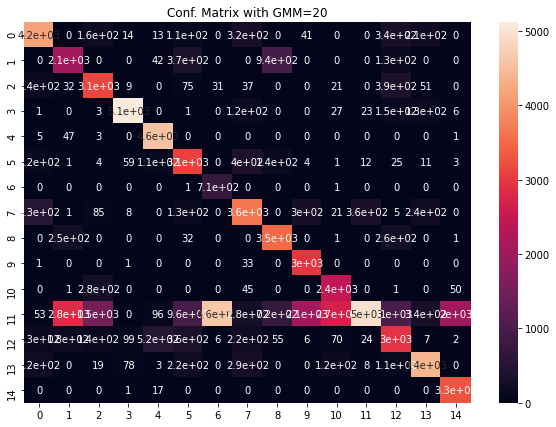

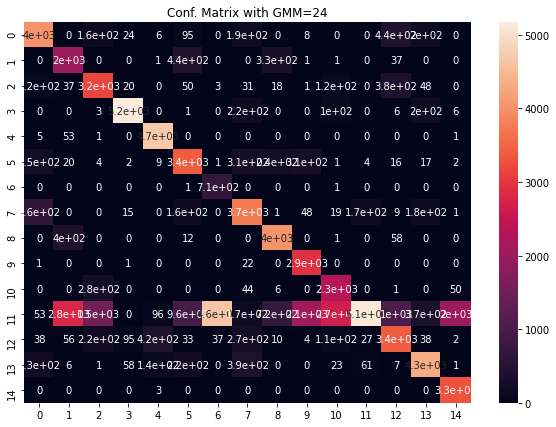

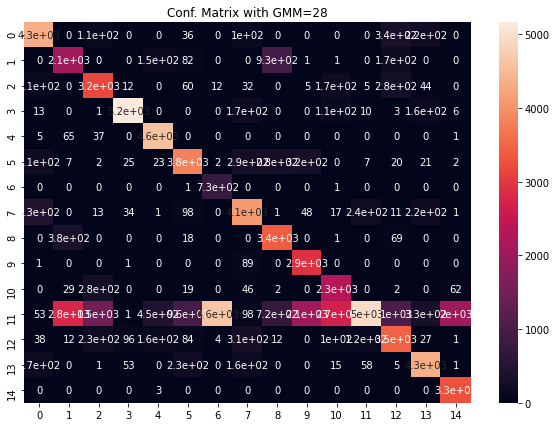

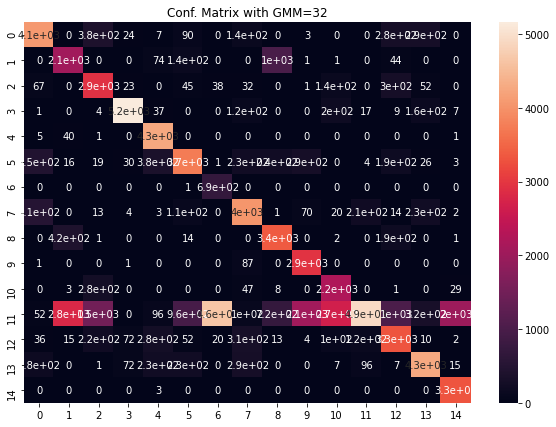

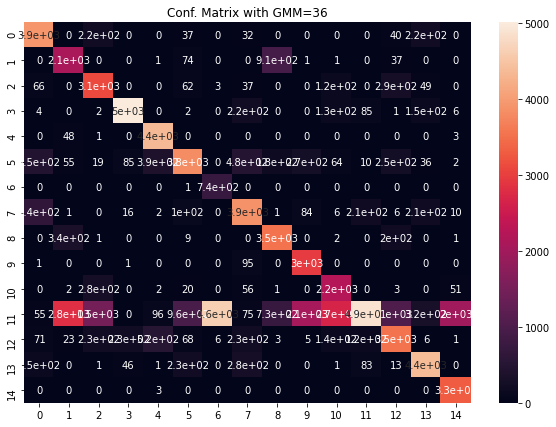

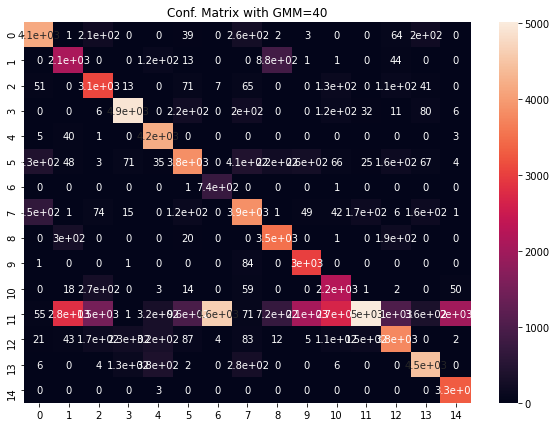

In [41]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


for k, mat in result_dict.items(): 
    plt.figure(figsize = (10,7))
    plt.title(f"Conf. Matrix with GMM={k}")
    sn.heatmap(mat, annot=True)


#### With z-norm and sin(phi)

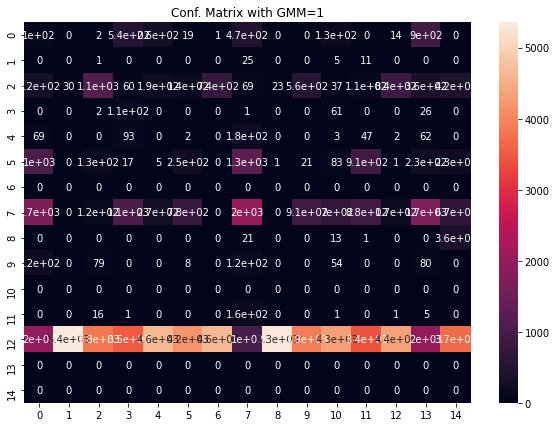

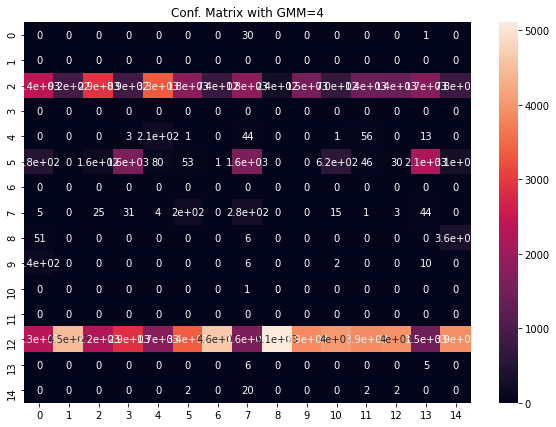

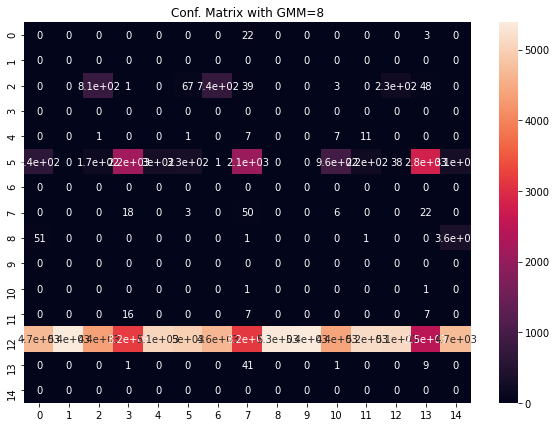

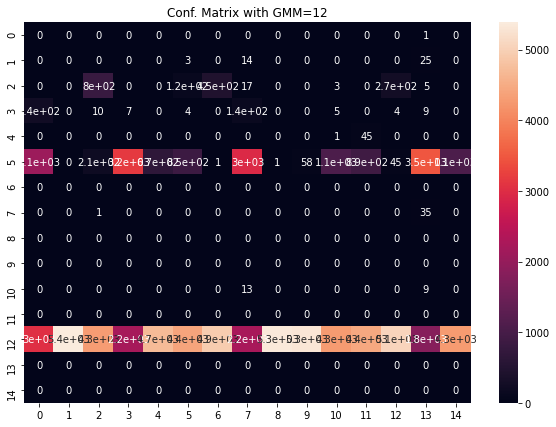

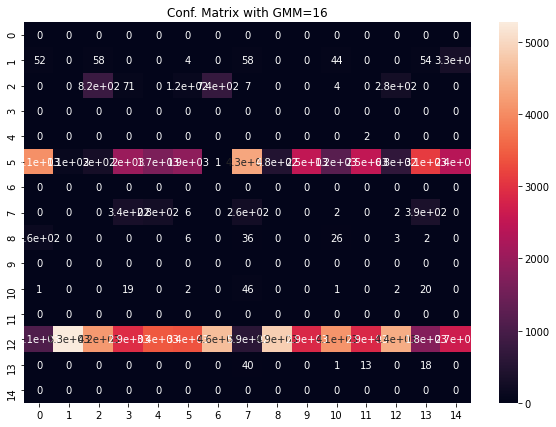

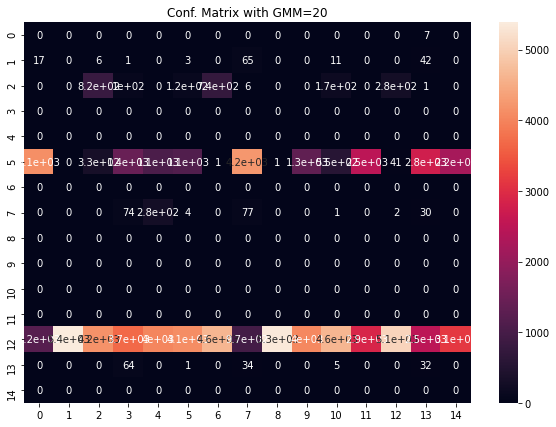

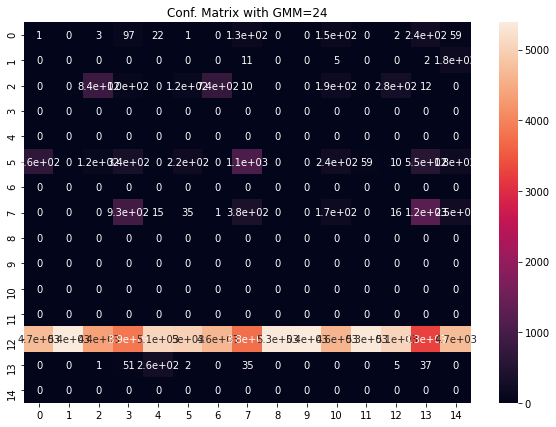

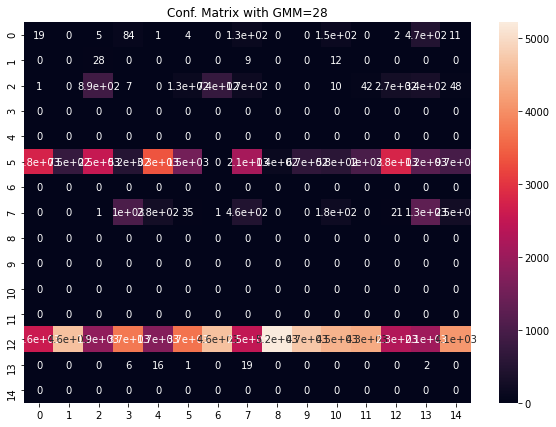

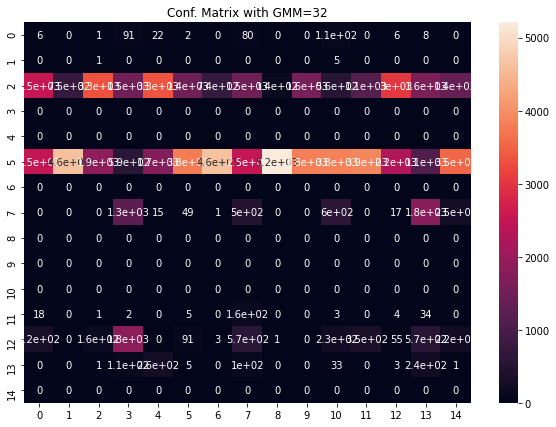

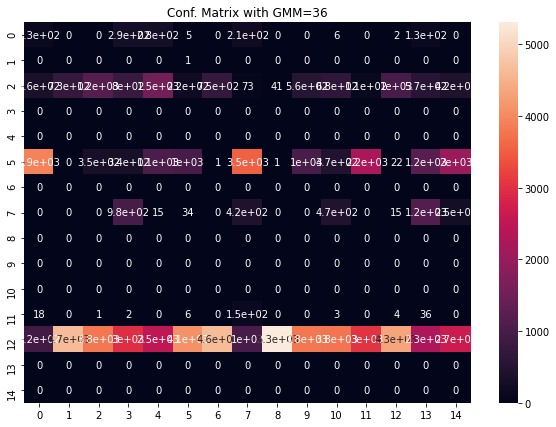

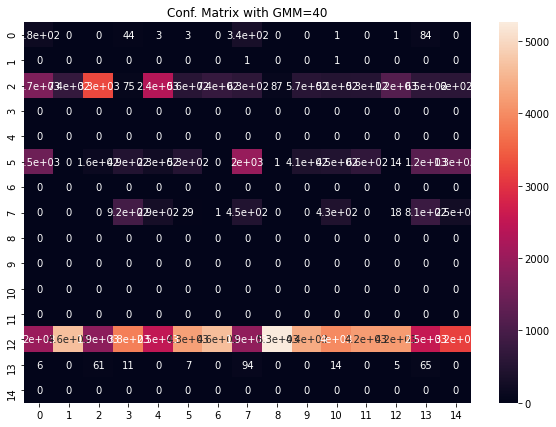

In [42]:
for k, mat in result_dict_norm.items(): 
    plt.figure(figsize = (10,7))
    plt.title(f"Conf. Matrix with GMM={k}")
    sn.heatmap(mat, annot=True)

In [43]:
### Accuracies sin(Phi)

In [44]:
Accs = []
for k, mat in result_dict.items():
    Acc_rate = np.trace(mat)/np.sum(np.sum(mat))
    Accs.append((k, Acc_rate))

In [45]:
Accs

[(1, 0.32573051545368853),
 (4, 0.5452572307387012),
 (8, 0.6141166840303617),
 (12, 0.6296943989681004),
 (16, 0.6414769062856576),
 (20, 0.6331175274098328),
 (24, 0.6490301136081759),
 (28, 0.652564865803443),
 (32, 0.6370367614228308),
 (36, 0.6416381405963189),
 (40, 0.6476906285657588)]